In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
data = pd.read_csv('Telco_Customer_Churn.csv')

In [42]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [44]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Pre-processing

In [45]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [46]:
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

In [47]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memory 

In [48]:
data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


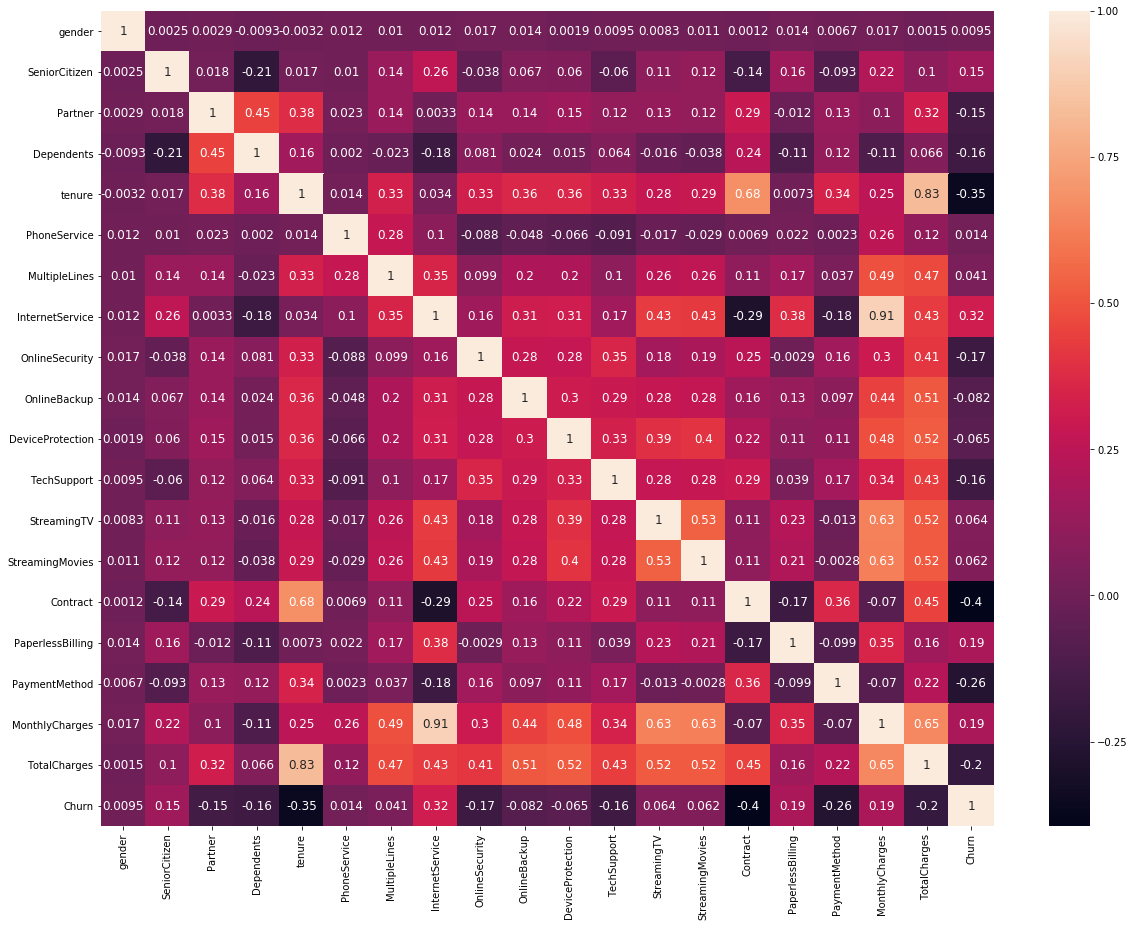

In [49]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [50]:
data.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

# Train test Splitting

In [51]:
train, test = train_test_split(data, test_size = 0.25)

train_y = train['Churn']
test_y = test['Churn']

train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

2637    0
1657    0
13      1
2842    0
3836    0
7002    0
6298    0
4709    0
714     0
4660    1
6296    0
37      0
4918    0
2347    0
3152    0
3969    0
4332    0
3064    0
450     0
3978    0
874     0
2108    0
4230    1
5767    0
2055    0
6440    0
4559    0
971     0
5372    0
5081    0
       ..
3392    0
6437    0
4575    0
6059    0
2367    1
4177    0
3912    0
4594    1
3339    0
2427    1
1642    0
6234    0
6202    1
2230    0
3991    1
4813    0
512     1
6087    0
5697    1
4036    0
6803    0
2014    0
3593    1
6893    1
2165    0
34      0
5321    0
2373    0
4300    0
5018    0
Name: Churn, Length: 1761, dtype: int64

# Logistic Regression

Intercept: [-0.86896309]
Regression: [[ 0.05888063  0.15512926  0.02538647 -0.2541699  -0.03465741 -0.29460549
   0.335004    1.16339571 -0.26131353 -0.05158936  0.01984261 -0.28682052
   0.33676071  0.42152101 -0.65633202  0.36158344 -0.13626681 -0.0098033 ]]
Accuracy of logistic regression classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1327
           1       0.62      0.52      0.57       434

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.80      0.80      0.80      1761



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

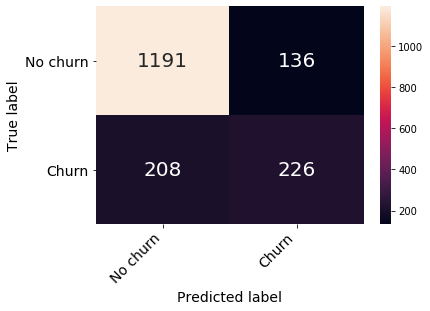

In [52]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)

test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [53]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Handling Imbalanced Classes

In [54]:
from sklearn.utils import resample

data_majority = data[data['Churn']==0]
data_minority = data[data['Churn']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5174, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [73]:
train, test = train_test_split(data_upsampled, test_size = 0.25)

train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']

train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')

logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)

test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.79      0.75      0.76      1295
           1       0.76      0.80      0.78      1292

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
from sklearn.metrics import roc_auc_score

# Get class probabilities for both models
test_y_prob = logisticRegr.predict_proba(test_x)
test_y_prob_balanced = logisticRegr_balanced.predict_proba(test_x_upsampled)

# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]

print('Unbalanced model AUROC: ' + str(roc_auc_score(test_y, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.842499279411305
Balanced model AUROC: 0.8447240608073943


In [78]:
train_x = train_x_upsampled
test_x = test_x_upsampled
train_y = train_y_upsampled
test_y = test_y_upsampled

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
test_y_pred = randomForest.predict(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

Accuracy of random forest classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1295
           1       0.88      0.92      0.90      1292

    accuracy                           0.90      2587
   macro avg       0.90      0.90      0.90      2587
weighted avg       0.90      0.90      0.90      2587



# Decision Tree

In [81]:
from sklearn import tree

# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)

# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)

In [82]:
test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred_dt))

Accuracy of decision tree classifier on test set: 0.75
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1295
           1       0.76      0.75      0.75      1292

    accuracy                           0.75      2587
   macro avg       0.75      0.75      0.75      2587
weighted avg       0.75      0.75      0.75      2587



# SVM

In [92]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train_x,train_y)
test_y_pred = clf.predict(test_x)

In [93]:
print('Accuracy of SVM : ',clf.score(test_x,test_y))
print(classification_report(test_y, test_y_pred))

Accuracy of SVM :  0.8156165442597604
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1295
           1       0.79      0.87      0.82      1292

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587



# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
kNN = KNeighborsClassifier(n_jobs = 4)
kNN.fit(train_x, train_y)
test_y_pred = kNN.predict(test_x)

In [95]:
score = kNN.score(test_x, test_y)
print ("Accuracy Score of kNN : ", score)
print(classification_report(test_y, test_y_pred))

Accuracy Score of kNN :  0.7781213761113258
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1295
           1       0.74      0.87      0.80      1292

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587



# XGBoost

In [99]:
import os, logging, gc
from time import time
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_recall_fscore_support

In [100]:
param_grid = {
    'silent': [False],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [50, 100, 150],
    'scale_pos_weight': [1, 1.5, 2],
    'max_delta_step': [1, 2, 3]
}

clf = XGBClassifier(objective = 'binary:logistic')

In [101]:
seed = 515
np.random.seed(seed)

In [102]:
clf = XGBClassifier(objective = 'binary:logistic')
fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(test_x, test_y)]}

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=50,
                            n_jobs=4, verbose=2, cv=5,
                            fit_params=fit_params,
                            scoring= 'f1_macro', refit=True, random_state=seed)


print("Randomized search..")

rs_clf.fit(train_x, train_y)


best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:643: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min


[0]	validation_0-logloss:0.64454
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.60707
[2]	validation_0-logloss:0.577243
[3]	validation_0-logloss:0.554246
[4]	validation_0-logloss:0.535383
[5]	validation_0-logloss:0.520089
[6]	validation_0-logloss:0.507009


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.5min finished


[7]	validation_0-logloss:0.496709
[8]	validation_0-logloss:0.487414
[9]	validation_0-logloss:0.479251
[10]	validation_0-logloss:0.473274
[11]	validation_0-logloss:0.468227
[12]	validation_0-logloss:0.463023
[13]	validation_0-logloss:0.457635
[14]	validation_0-logloss:0.454035
[15]	validation_0-logloss:0.451188
[16]	validation_0-logloss:0.448052
[17]	validation_0-logloss:0.444885
[18]	validation_0-logloss:0.442459
[19]	validation_0-logloss:0.44054
[20]	validation_0-logloss:0.438811
[21]	validation_0-logloss:0.437742
[22]	validation_0-logloss:0.436816
[23]	validation_0-logloss:0.435718
[24]	validation_0-logloss:0.434283
[25]	validation_0-logloss:0.432785
[26]	validation_0-logloss:0.432023
[27]	validation_0-logloss:0.431176
[28]	validation_0-logloss:0.430023
[29]	validation_0-logloss:0.429137
[30]	validation_0-logloss:0.428461
[31]	validation_0-logloss:0.427526
[32]	validation_0-logloss:0.426543
[33]	validation_0-logloss:0.425595
[34]	validation_0-logloss:0.425125
[35]	validation_0-loglos

In [103]:
def xgb_f1(y, t):
    
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)

def plot_evaluation_metric (y_true, y_prob):

    skplt.metrics.plot_cumulative_gain(y_true, y_prob)
    plt.show();
    skplt.metrics.plot_precision_recall(y_true, y_prob)
    plt.show();
    skplt.metrics.plot_lift_curve(y_true, y_prob)
    plt.show();
    return 


def print_evaluation_metric (y_true, y_pred):

    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred)
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F-score: {}".format(fscore))
    print("Support: {}".format(support))
    return 


def get_confusion_matrix (y_true, y_pred, save=0, filename="this.csv"):

    from sklearn.metrics import confusion_matrix
    get_ipython().magic('matplotlib inline')
    cm = pd.DataFrame(confusion_matrix(y_true, y_pred),
                      columns = ['Predicted False', 'Predicted True'],
                      index = ['Actual False', 'Actual True']
                      )
    display(cm)
    if(save):
        cm.to_csv(filename, index = True)
    
    return 

In [107]:
best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = False,
                         n_jobs = 4
                        )

best_xgb.fit(train_x, train_y, eval_metric = xgb_f1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=1, learning_rate=0.15, max_delta_step=3,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=10, scale_pos_weight=1.5, seed=None,
       silent=False, subsample=0.9)

In [110]:
score = best_xgb.score(test_x, test_y)
pred_y_test = best_xgb.predict(test_x)
print('Accuracy of XGBoost is : ',score)
print(classification_report(test_y, test_y_pred))

Accuracy of XGBoost is :  0.7978421351504826


In [111]:
y_pred = best_xgb.predict(test_x)
y_prob = best_xgb.predict_proba(test_x)
print_evaluation_metric(test_y, y_pred)
get_confusion_matrix (test_y, y_pred, save=0, filename="this.csv")

Precision: [0.88474026 0.59546314]
Recall: [0.83588957 0.6892779 ]
F-score: [0.85962145 0.63894523]
Support: [1304  457]


,Predicted False,Predicted True
Actual False,1090,214
Actual True,142,315


# Naive Bayes 

In [88]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

In [99]:
clf = GaussianNB()
clf.fit(train_x,train_y)
test_pred_y = clf.predict(test_x)
print("Accuracy of Gaussian Naive Bayes Classifier :",metrics.accuracy_score(test_y, pred_y))
print(classification_report(test_y, test_y_pred))

Accuracy of Gaussian Naive Bayes Classifier : 0.7340548898337843
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1295
           1       0.74      0.87      0.80      1292

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587



In [100]:
clf = BernoulliNB()
clf.fit(train_x,train_y)
test_pred_y = clf.predict(test_x)
print("Accuracy of Bernaulli Naive Bayes Classifier :",metrics.accuracy_score(test_y, pred_y))
print(classification_report(test_y, test_y_pred))

Accuracy of Bernaulli Naive Bayes Classifier : 0.7340548898337843
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1295
           1       0.74      0.87      0.80      1292

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587



In [101]:
clf = MultinomialNB()
clf.fit(train_x,train_y)
test_pred_y = clf.predict(test_x)
print("Accuracy of Multinomial Naive Bayes Classifier :",metrics.accuracy_score(test_y, pred_y))
print(classification_report(test_y, test_y_pred))

Accuracy of Multinomial Naive Bayes Classifier : 0.7340548898337843
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1295
           1       0.74      0.87      0.80      1292

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587

